**Aluno:Igor Correa Trifilio Campos**       
**Matrícula:202365092A**

Diretor selecionado para análise: **Buster Keaton**

In [ ]:
!pip install pandas;

In [ ]:
import pandas as pd;
import numpy as np;
import re
from matplotlib import pyplot as plt;

**Operando o DataFrame:**

In [ ]:
DataFrameRT= pd.read_csv("/content/rotten_tomatoes_movies.csv");

#Filtro de todas os filmes que Buster Keaton esteve envolvido na Direção
Filtro = DataFrameRT.directors.str.contains('Buster Keaton', na=False);
Filmes_Buster = DataFrameRT.loc[Filtro, 'directors'];
FiltroDF=pd.DataFrame.from_dict(Filmes_Buster)
DataFrameRT['directors']= FiltroDF;
Filmes_Buster=DataFrameRT.dropna(subset = 'directors')

#Cópia do dataframe para evitar possíveis erros ao copiar o dataframe original
filmes_BCopy = Filmes_Buster.copy();

#Váriaveis para a conta da média aritmética
TomatoRat=Filmes_Buster[['tomatometer_rating']].to_numpy();
AudRat= Filmes_Buster[['audience_rating']].to_numpy();
num_linhas, num_col= Filmes_Buster.shape;
valoresMed_Av= np.zeros(num_linhas);

for i in range(num_linhas):
  valoresMed_Av[i]=(TomatoRat[i]+AudRat[i])/2.0;

filmes_BCopy.loc[:,('Média das avaliações')] = valoresMed_Av;

#Ordenando os dados do DataFrame na ordem de lançamento do mais antigo para o mais recente
filmes_BCopy.loc[:,('original_release_date')];
Filmes_Buster_Ord=filmes_BCopy.sort_values(by='original_release_date');

#resultado final do DataFrame
Filmes_Buster_Ord

FileNotFoundError: ignored

**Plotamento do gráfico:**

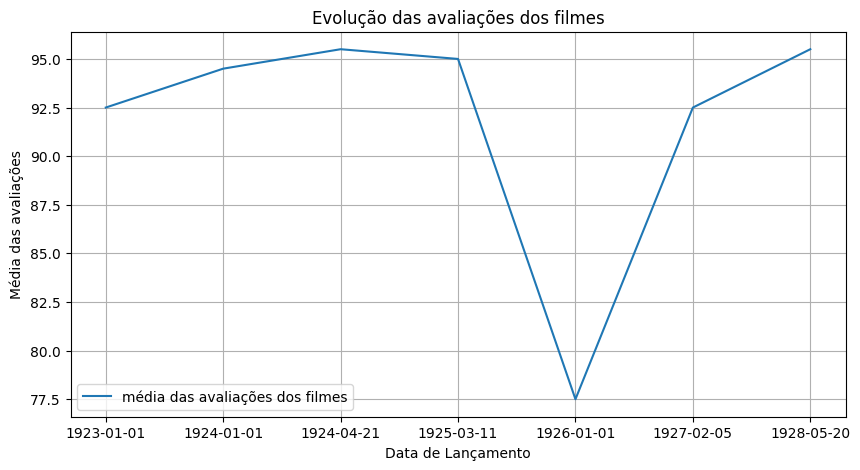

In [ ]:
#Comandos para a plotação do gráfico
tam = plt.figure(figsize=(10,5))
plt.plot(Filmes_Buster_Ord['original_release_date'],Filmes_Buster_Ord['Média das avaliações'], label="média das avaliações dos filmes");
plt.ylabel('Média das avaliações');
plt.xlabel('Data de Lançamento');
plt.title("Evolução das avaliações dos filmes");
plt.grid(True);
plt.legend();
plt.show();




**Demonstração dos dados estatísticos:**

In [ ]:
#vetor e variáveis auxiliares para o cálculo da média dos valores
vetMedia=np.zeros(num_linhas);
medAudRat=0;
soma=0;

#função que calcula a média geral das avaliações críticas dos filmes do diretor
#em relação 60% da média das avaliações da audiencia dos seus filmes
def MediaGeral():
  global soma, medAudRat;
  for i in range(num_linhas):
    soma+=valoresMed_Av[i];
  soma = soma/num_linhas;

  for i in range(num_linhas):
    medAudRat+=AudRat[i];
  medAudRat= medAudRat/num_linhas;

  if soma>(medAudRat*0.6):
    print("A média das avaliações dos filmes de Buster Keaton são superiores a 60% das avaliações da audiência");

MediaGeral();
print("A média das avaliações do público foram aproximadamente:",round(medAudRat[0]),"pontos");
print("A média da crítica foi aproximadamente:",round(soma),"pontos");
print("60% da média das avaliações do público são:",round(medAudRat[0]*0.6),"pontos");



A média das avaliações dos filmes de Buster Keaton são superiores a 60% das avaliações da audiência
A média das avaliações do público foram aproximadamente: 89 pontos
A média da crítica foi aproximadamente: 92 pontos
60% da média das avaliações do público são: 53 pontos


**Exportando o arquivo em CSV:**

In [ ]:
Filmes_Buster_Ord.to_csv('/content/AtividadeRottenTomatoes.csv');